# Information Retrieval & Data Mining

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from urllib.request import urlopen
from bs4 import BeautifulSoup
style.use('seaborn')

In [2]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [3]:
url = 'https://www.denismahony.ie/used-cars?carMake=&carModel=&carPriceTo=&carPriceFrom=&carYearFrom=&carYearTo=&carLocation=&carBody=&carFuel=&carTransmission=&carDoors=&page=1'

site = urlopen(url)

In [4]:
response = requests.get(url)
print(response)

<Response [200]>


In [5]:
soup = BeautifulSoup(site, 'lxml')

In [6]:
# Getting title.
title = soup.title.text
print(title)

denismahony.ie


In [7]:
site = urlopen(url)
soup = BeautifulSoup(site, 'lxml')

In [8]:
html = soup.find_all('div',class_ = "used-car-list")
print(html)

[<div class="used-car-list">
<div class="used-car">
<div>
<a class="cb-image" href="/used-car/ford-transit-custom-25427153">
<img alt="FORD TRANSIT CUSTOM 300L BASE 2.0D @ DENIS MAHONY KILBARRACK" src=""/>
</a>
<div class="cb-details">
<a class="cb-title" href="/used-car/ford-transit-custom-25427153">
<span>2019 FORD TRANSIT CUSTOM</span>
</a>
<a class="cb-sub-title" href="/used-car/ford-transit-custom-25427153">
<span>300L BASE 2.0D @ DENIS MAHONY KILBA...</span>
</a>
<div class="cb-location">
<span>Denis Mahony Kilbarrack</span>
</div>
</div>
<div class="cb-info">
<div class="cb-fuel">2.0 Diesel</div>
<div class="cb-mileage">58,000 Kms</div>
<div class="cb-year">2019</div>
</div>
<div class="cb-price-info">
<div class="cb-price">
<span class="cb-main-price">€21,095</span>
</div>
<div class="fav_container">
<a class="cb-favourite favourites" data-car="1881" href="#"></a>
</div>
<div class="cb-price-monthly">
<span>per month</span>
	            €347	        </div>
</div>
<div class="cb

In [9]:
# total number of cars ads

total_ads = 0
ads = ''
for ad in soup.find_all('div',class_ = 'search-result-count'):
    ads = ad.get_text()[0:3].strip()
    total_ads = int(ads)
print(total_ads)

65


In [10]:
# creating the list I need.
name = []
fuel = []
year = []
mileage = []
value = []

site_load = int(total_ads / 24)+1 # pages

for i in range(1,site_load+1):
    url = f'https://www.denismahony.ie/used-cars?carMake=&carModel=&carPriceTo=&carPriceFrom=&carYearFrom=&carYearTo=&carLocation=&carBody=&carFuel=&carTransmission=&carDoors=&page={i}'
    #next_page(url)
    
    new_url = url
    new_site = urlopen(new_url)
    details_soup = soup.find_all('div',class_ = "cb-details")
    info_soup = soup.find_all('div',class_ = "cb-info")
    price_soup = soup.find_all('div',class_ = "cb-price-info")
    
    for j in details_soup:    
        name.append(j.find('span').get_text().strip()[5::]) #Cleaning the name, I will storage the year in another list
    for j in info_soup:    
        fuel.append(j.find('div', class_ = 'cb-fuel').get_text()[3:].strip())
        mileage.append(int(j.find('div', class_ = 'cb-mileage').get_text().replace(',','').replace(' Kms',''))) # casted into integer
        year.append(j.find('div', class_ = 'cb-year').get_text()) # casted to integer
    for j in price_soup:    
        value.append(j.find('div', class_ = 'cb-price').get_text().replace('\n','').replace('€','').replace(',',''))


In [11]:
print(value)

['21095', '29225', '31950', '11950', '15950', '24350', '24950', '25950', '14950', '34950', '14950', '12950', '23950', '18950', '15950', '23310', '38950', '16950', '30950', '31950', 'POA', '16950', '19950', '19950', '21095', '29225', '31950', '11950', '15950', '24350', '24950', '25950', '14950', '34950', '14950', '12950', '23950', '18950', '15950', '23310', '38950', '16950', '30950', '31950', 'POA', '16950', '19950', '19950', '21095', '29225', '31950', '11950', '15950', '24350', '24950', '25950', '14950', '34950', '14950', '12950', '23950', '18950', '15950', '23310', '38950', '16950', '30950', '31950', 'POA', '16950', '19950', '19950']


In [12]:
# More cleaning
value_clean = []

for sq in value:
    
    if sq.isalpha(): # checking if sq has letters, we only need numbers as this is the car value.
        #print(area_float) # to check those values we do not need.
        sq = np.NaN

    value_clean.append(sq)
    


In [13]:
# let's check if 'POA' values turned into nan
print(value_clean)

['21095', '29225', '31950', '11950', '15950', '24350', '24950', '25950', '14950', '34950', '14950', '12950', '23950', '18950', '15950', '23310', '38950', '16950', '30950', '31950', nan, '16950', '19950', '19950', '21095', '29225', '31950', '11950', '15950', '24350', '24950', '25950', '14950', '34950', '14950', '12950', '23950', '18950', '15950', '23310', '38950', '16950', '30950', '31950', nan, '16950', '19950', '19950', '21095', '29225', '31950', '11950', '15950', '24350', '24950', '25950', '14950', '34950', '14950', '12950', '23950', '18950', '15950', '23310', '38950', '16950', '30950', '31950', nan, '16950', '19950', '19950']


In [14]:
print(name)

['FORD TRANSIT CUSTOM', 'HYUNDAI Santa FE', 'Toyota C-HR', 'Toyota Auris', 'SKODA RAPID', 'TOYOTA Hilux', 'PEUGEOT 3008', 'Toyota Corolla', 'SEAT LEON', 'NISSAN X-TRAIL', 'Toyota Auris', 'CITROEN BERLINGO', 'KIA OPTIMA', 'MERCEDES BENZ Vito', 'HYUNDAI I20', 'MERCEDES BENZ Vito', 'Toyota Camry', 'VOLKSWAGEN Golf', 'LEXUS IS300H', 'Lexus GS300H', 'MERCEDES BENZ E 220', 'Toyota Yaris', 'VOLKSWAGEN Golf', 'Toyota Yaris', 'FORD TRANSIT CUSTOM', 'HYUNDAI Santa FE', 'Toyota C-HR', 'Toyota Auris', 'SKODA RAPID', 'TOYOTA Hilux', 'PEUGEOT 3008', 'Toyota Corolla', 'SEAT LEON', 'NISSAN X-TRAIL', 'Toyota Auris', 'CITROEN BERLINGO', 'KIA OPTIMA', 'MERCEDES BENZ Vito', 'HYUNDAI I20', 'MERCEDES BENZ Vito', 'Toyota Camry', 'VOLKSWAGEN Golf', 'LEXUS IS300H', 'Lexus GS300H', 'MERCEDES BENZ E 220', 'Toyota Yaris', 'VOLKSWAGEN Golf', 'Toyota Yaris', 'FORD TRANSIT CUSTOM', 'HYUNDAI Santa FE', 'Toyota C-HR', 'Toyota Auris', 'SKODA RAPID', 'TOYOTA Hilux', 'PEUGEOT 3008', 'Toyota Corolla', 'SEAT LEON', 'NISSAN

In [15]:
print(fuel)

['Diesel', 'Diesel', 'Hybrid', 'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Hybrid', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Diesel', 'Diesel', 'Petrol', 'Diesel', 'Hybrid', 'Petrol', 'Hybrid', 'Hybrid', 'Diesel', 'Hybrid', 'Diesel', 'Petrol', 'Diesel', 'Diesel', 'Hybrid', 'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Hybrid', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Diesel', 'Diesel', 'Petrol', 'Diesel', 'Hybrid', 'Petrol', 'Hybrid', 'Hybrid', 'Diesel', 'Hybrid', 'Diesel', 'Petrol', 'Diesel', 'Diesel', 'Hybrid', 'Petrol', 'Diesel', 'Diesel', 'Petrol', 'Hybrid', 'Petrol', 'Diesel', 'Petrol', 'Diesel', 'Diesel', 'Diesel', 'Petrol', 'Diesel', 'Hybrid', 'Petrol', 'Hybrid', 'Hybrid', 'Diesel', 'Hybrid', 'Diesel', 'Petrol']


In [16]:
print(mileage)

[58000, 14000, 41000, 41000, 91000, 138374, 95555, 39000, 91000, 65000, 50000, 129000, 95000, 114000, 61000, 89000, 25000, 93843, 97600, 127000, 2200, 70000, 124000, 41000, 58000, 14000, 41000, 41000, 91000, 138374, 95555, 39000, 91000, 65000, 50000, 129000, 95000, 114000, 61000, 89000, 25000, 93843, 97600, 127000, 2200, 70000, 124000, 41000, 58000, 14000, 41000, 41000, 91000, 138374, 95555, 39000, 91000, 65000, 50000, 129000, 95000, 114000, 61000, 89000, 25000, 93843, 97600, 127000, 2200, 70000, 124000, 41000]


In [17]:
print(year)

['2019', '2019', '2020', '2013', '2018', '2018', '2018', '2019', '2017', '2020', '2015', '2018', '2019', '2019', '2018', '2019', '2020', '2016', '2018', '2018', '2022', '2017', '2018', '2020', '2019', '2019', '2020', '2013', '2018', '2018', '2018', '2019', '2017', '2020', '2015', '2018', '2019', '2019', '2018', '2019', '2020', '2016', '2018', '2018', '2022', '2017', '2018', '2020', '2019', '2019', '2020', '2013', '2018', '2018', '2018', '2019', '2017', '2020', '2015', '2018', '2019', '2019', '2018', '2019', '2020', '2016', '2018', '2018', '2022', '2017', '2018', '2020']


In [18]:
web_data = {'name':name,'fuel':fuel,'mileage':mileage,'year':year,'value':value_clean}
data_frame = pd.DataFrame(web_data)
print(data_frame)

                   name    fuel  mileage  year  value
0   FORD TRANSIT CUSTOM  Diesel    58000  2019  21095
1      HYUNDAI Santa FE  Diesel    14000  2019  29225
2           Toyota C-HR  Hybrid    41000  2020  31950
3          Toyota Auris  Petrol    41000  2013  11950
4           SKODA RAPID  Diesel    91000  2018  15950
..                  ...     ...      ...   ...    ...
67         Lexus GS300H  Hybrid   127000  2018  31950
68  MERCEDES BENZ E 220  Diesel     2200  2022    NaN
69         Toyota Yaris  Hybrid    70000  2017  16950
70      VOLKSWAGEN Golf  Diesel   124000  2018  19950
71         Toyota Yaris  Petrol    41000  2020  19950

[72 rows x 5 columns]


In [19]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     72 non-null     object
 1   fuel     72 non-null     object
 2   mileage  72 non-null     int64 
 3   year     72 non-null     object
 4   value    69 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


In [20]:
# As shown above value column has nan values, so let's remove those rows
data_frame.dropna(inplace=True) # keep changes in dataframe.

In [21]:
# printing again
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 71
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     69 non-null     object
 1   fuel     69 non-null     object
 2   mileage  69 non-null     int64 
 3   year     69 non-null     object
 4   value    69 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.2+ KB


In [22]:
data_frame

,name,fuel,mileage,year,value
0,FORD TRANSIT CUSTOM,Diesel,58000,2019,21095
1,HYUNDAI Santa FE,Diesel,14000,2019,29225
2,Toyota C-HR,Hybrid,41000,2020,31950
3,Toyota Auris,Petrol,41000,2013,11950
4,SKODA RAPID,Diesel,91000,2018,15950
...,...,...,...,...,...
66,LEXUS IS300H,Hybrid,97600,2018,30950
67,Lexus GS300H,Hybrid,127000,2018,31950
69,Toyota Yaris,Hybrid,70000,2017,16950
70,VOLKSWAGEN Golf,Diesel,124000,2018,19950


In [23]:
# price column was object and we changed from obj to integer
data_frame['value']=data_frame['value'].astype(int)

In [24]:
data_frame.dtypes  # Now we can use the 'value' cloumn to statistic

name       object
fuel       object
mileage     int64
year       object
value       int64
dtype: object

In [25]:
# new lists
df_name = data_frame['name'].to_list()
df_fuel = data_frame['fuel'].to_list()
df_mileage = data_frame['mileage'].to_list()
df_year = data_frame['year'].to_list()
df_value = data_frame['value'].to_list()

In [26]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 71
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     69 non-null     object
 1   fuel     69 non-null     object
 2   mileage  69 non-null     int64 
 3   year     69 non-null     object
 4   value    69 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.2+ KB


In [28]:
df_value = data_frame['value'].to_list()
data_frame

,name,fuel,mileage,year,value
0,FORD TRANSIT CUSTOM,Diesel,58000,2019,21095
1,HYUNDAI Santa FE,Diesel,14000,2019,29225
2,Toyota C-HR,Hybrid,41000,2020,31950
3,Toyota Auris,Petrol,41000,2013,11950
4,SKODA RAPID,Diesel,91000,2018,15950
...,...,...,...,...,...
66,LEXUS IS300H,Hybrid,97600,2018,30950
67,Lexus GS300H,Hybrid,127000,2018,31950
69,Toyota Yaris,Hybrid,70000,2017,16950
70,VOLKSWAGEN Golf,Diesel,124000,2018,19950


In [29]:
data_frame.to_excel('data.xlsx', index = False)

In [30]:
data_frame.describe(include=[np.number])

,mileage,value
count,69.000000,69.000000
mean,77842.260870,22653.478261
std,35139.712497,7384.056668
min,14000.000000,11950.000000
25%,41000.000000,15950.000000
50%,89000.000000,21095.000000
75%,97600.000000,29225.000000
max,138374.000000,38950.000000


In [34]:
data_frame.head()

,name,fuel,mileage,year,value
0,FORD TRANSIT CUSTOM,Diesel,58000,2019,21095
1,HYUNDAI Santa FE,Diesel,14000,2019,29225
2,Toyota C-HR,Hybrid,41000,2020,31950
3,Toyota Auris,Petrol,41000,2013,11950
4,SKODA RAPID,Diesel,91000,2018,15950


In [35]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 71
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     69 non-null     object
 1   fuel     69 non-null     object
 2   mileage  69 non-null     int64 
 3   year     69 non-null     object
 4   value    69 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.2+ KB


In [36]:
data_frame.isnull().sum()

name       0
fuel       0
mileage    0
year       0
value      0
dtype: int64

In [37]:
data_frame.describe()

,mileage,value
count,69.000000,69.000000
mean,77842.260870,22653.478261
std,35139.712497,7384.056668
min,14000.000000,11950.000000
25%,41000.000000,15950.000000
50%,89000.000000,21095.000000
75%,97600.000000,29225.000000
max,138374.000000,38950.000000


### Starting catogorical visualisation

In [42]:
data_frame.columns

Index(['name', 'fuel', 'mileage', 'year', 'value'], dtype='object')

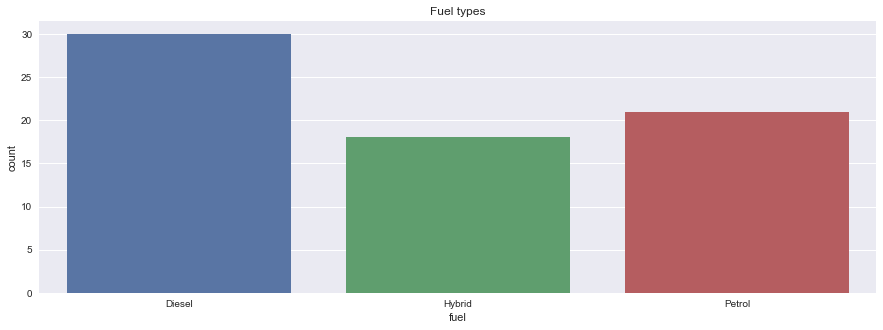

In [43]:
sns.countplot(x='fuel', data=data_frame)
plt.title('Fuel types')
plt.show()

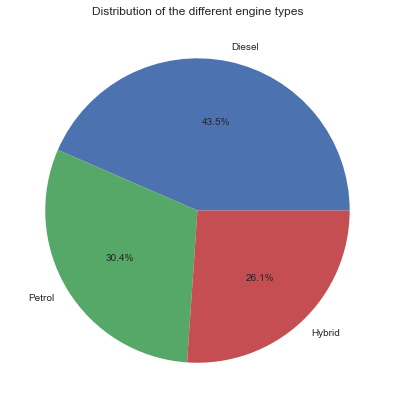

In [44]:
fig = plt.figure(figsize=(7,7))
tags = data_frame['fuel'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title('Distribution of the different engine types')
plt.show()

In [45]:
# now by doing this creating charts
fuel = data_frame['fuel']
name = data_frame['name']
value = data_frame['value']

<AxesSubplot:xlabel='name', ylabel='value'>

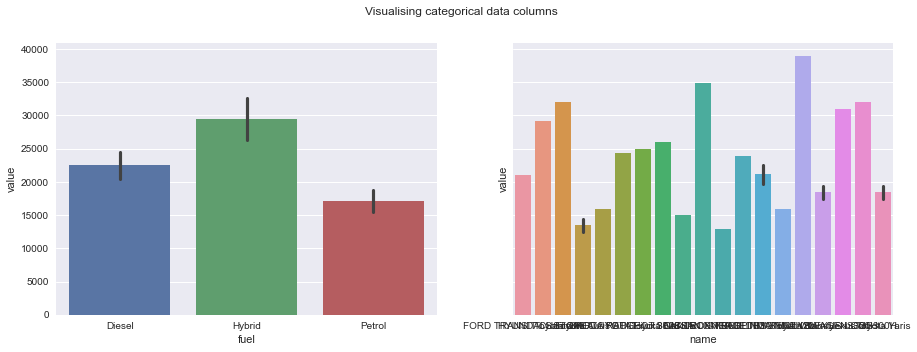

In [46]:
# here doing Catogorical visualisation
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Visualising categorical data columns')
sns.barplot(x=fuel, y=value, ax = axes[0])
sns.barplot(x=name, y=value, ax = axes[1])

### Starting numerical visualisation

<AxesSubplot:>

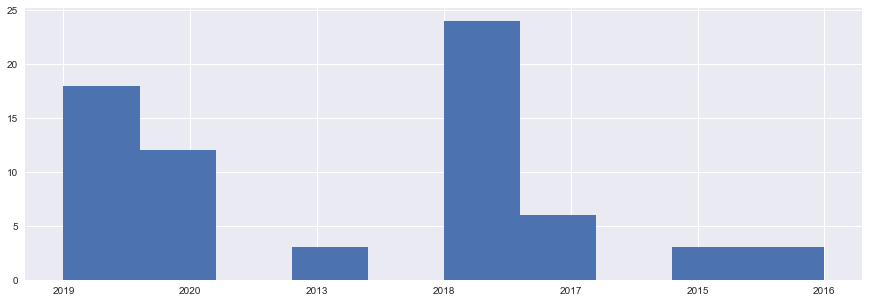

In [47]:
# by doing this we can see all cars that time period
data_frame['year'].hist()

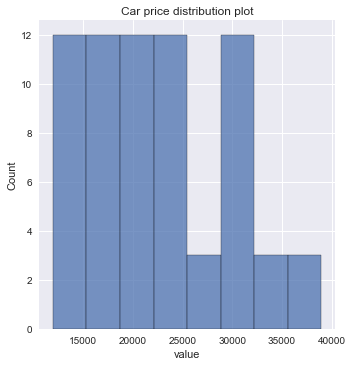

In [48]:
# also we saw that how many cars in that value period
sns.displot(data_frame.value)
plt.title('Car price distribution plot')
plt.show()

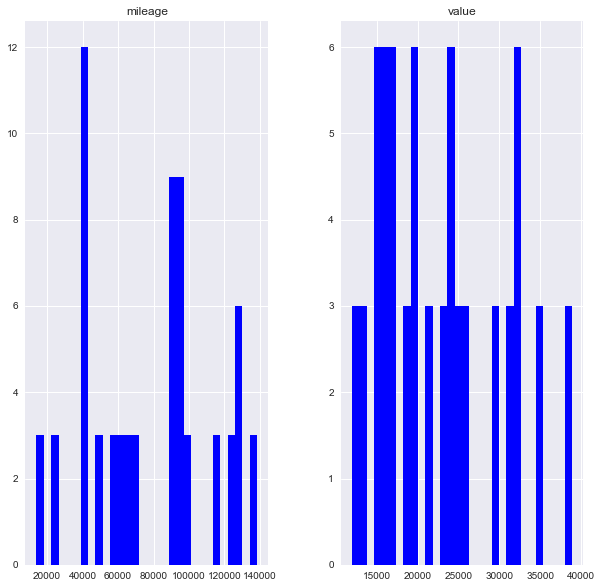

In [49]:
data_frame[['mileage', 'value']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

### Starting from here data analysis

In [50]:
# by doing this we replace from str ti int so we can use this column in the correlation
data_frame.replace({'fuel':{'Petrol':0, 'Diesel':1, 'Hybrid':2, 'Electric':3}},inplace=True)

In [51]:
data_frame.head()

,name,fuel,mileage,year,value
0,FORD TRANSIT CUSTOM,1,58000,2019,21095
1,HYUNDAI Santa FE,1,14000,2019,29225
2,Toyota C-HR,2,41000,2020,31950
3,Toyota Auris,0,41000,2013,11950
4,SKODA RAPID,1,91000,2018,15950


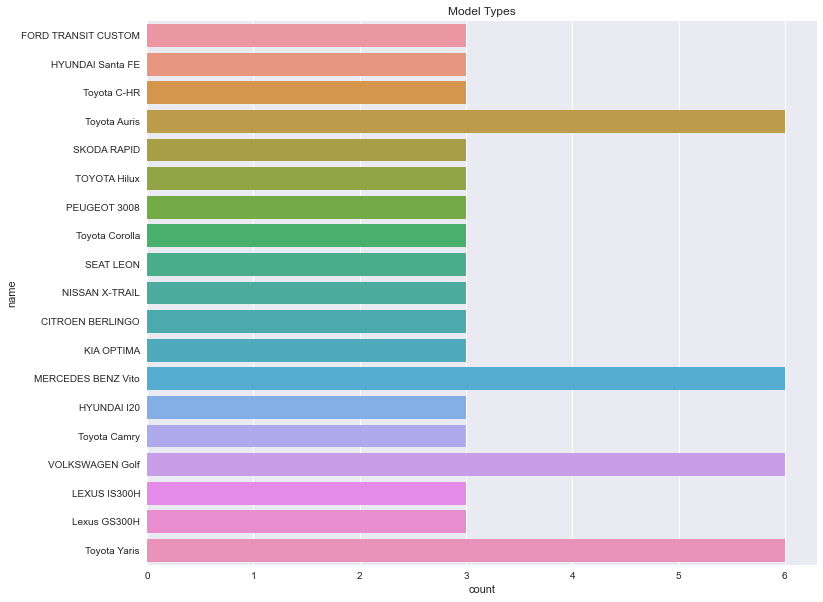

In [52]:
plt.figure(figsize=(12,10))
sns.countplot(y='name', data=data_frame)
plt.title('Model Types')
plt.show()

In [53]:
# in here i dropped name column for the correlation
modified_data_frame = data_frame.drop("name", axis=1)
modified_data_frame.head()

,fuel,mileage,year,value
0,1,58000,2019,21095
1,1,14000,2019,29225
2,2,41000,2020,31950
3,0,41000,2013,11950
4,1,91000,2018,15950


In [54]:
# changing those column data types from str to int 
data_frame['fuel']=data_frame['fuel'].astype(int)
data_frame['year']=data_frame['year'].astype(int)

In [55]:
# Now as we see data frame ready to correlation
data_frame.corr()

,fuel,mileage,year,value
fuel,1.000000,0.006716,0.462390,0.629860
mileage,0.006716,1.000000,-0.080862,-0.213255
year,0.462390,-0.080862,1.000000,0.645289
value,0.629860,-0.213255,0.645289,1.000000


# Algorithms & Mathematical Methods

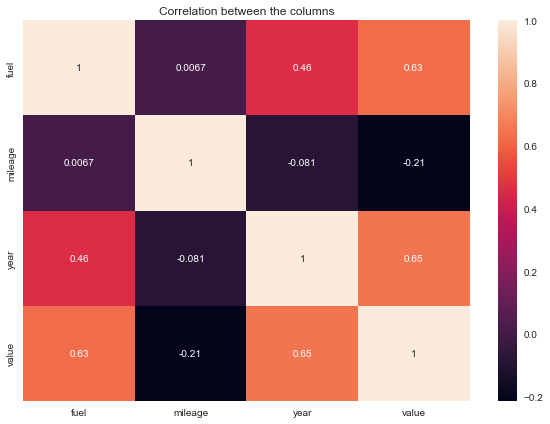

In [56]:
# creating the correlation
plt.figure(figsize=(10,7))
sns.heatmap(data_frame.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [57]:
data_frame.corr()['value'].sort_values()

mileage   -0.213255
fuel       0.629860
year       0.645289
value      1.000000
Name: value, dtype: float64

<AxesSubplot:title={'center':'Correlation between year and price'}, xlabel='value', ylabel='year'>

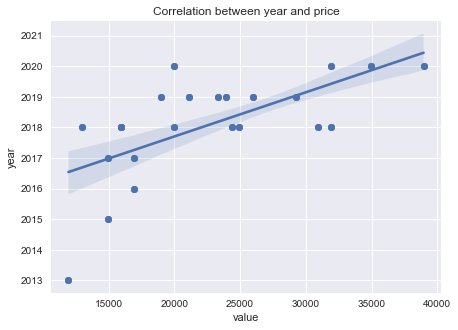

In [58]:
# Creating linier function for math 
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between year and price')
sns.regplot(x='value', y='year', data=data_frame)


# Programming paradigms

In [64]:
# All car values list
df_value

[21095,
 29225,
 31950,
 11950,
 15950,
 24350,
 24950,
 25950,
 14950,
 34950,
 14950,
 12950,
 23950,
 18950,
 15950,
 23310,
 38950,
 16950,
 30950,
 31950,
 16950,
 19950,
 19950,
 21095,
 29225,
 31950,
 11950,
 15950,
 24350,
 24950,
 25950,
 14950,
 34950,
 14950,
 12950,
 23950,
 18950,
 15950,
 23310,
 38950,
 16950,
 30950,
 31950,
 16950,
 19950,
 19950,
 21095,
 29225,
 31950,
 11950,
 15950,
 24350,
 24950,
 25950,
 14950,
 34950,
 14950,
 12950,
 23950,
 18950,
 15950,
 23310,
 38950,
 16950,
 30950,
 31950,
 16950,
 19950,
 19950]

In [65]:
# Defining expensive class
class expensive:
    def __init__(self, car):
        self.car = car
        
    def most_expensive_car(df_value):
    
        most_exp = df_value[0]

        for x in range(0,len(df_value)):
    
            if most_exp < df_value[x]:
                most_exp = df_value[x]
        return most_exp

In [66]:
# Creating an object-class to retrieve method 'most_expensive_car'
most_expensive = expensive

In [67]:
# Instantiating class object to get the highest value on my list of cars
most_expensive.most_expensive_car(df_value)

38950